In [1]:
import numpy as np
import pandas as pd
import pickle as pkl
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns 
import scipy.stats as ss
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from sklearn import metrics
import time
%matplotlib inline

In [2]:
data_path = '/Users/leo/Desktop/DSGA-3001/Project/data/'
train = pd.read_csv(data_path+'application_train.csv')

In [3]:
print(train.shape)

(307511, 122)


In [4]:
# 0 - paid
# 1 - unpaid
train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Target distribution

In [5]:
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

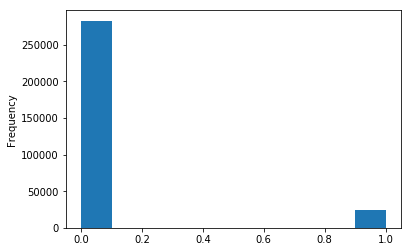

In [6]:
# imbalanced data
train['TARGET'].astype(int).plot.hist()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


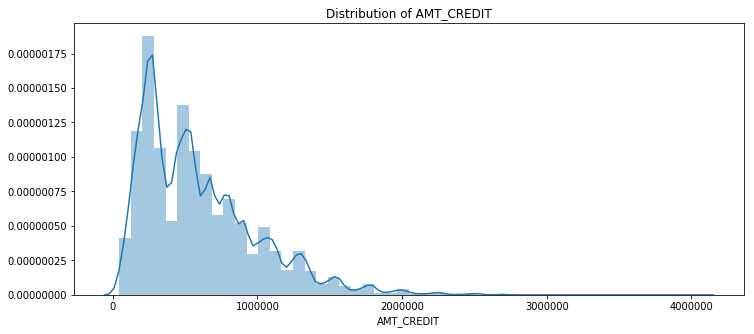

In [7]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(train["AMT_CREDIT"])

In [8]:
X = train.loc[:, train.columns != 'TARGET']
y = train.loc[:, train.columns == 'TARGET']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (215257, 121)
Number transactions y_train dataset:  (215257, 1)
Number transactions X_test dataset:  (92254, 121)
Number transactions y_test dataset:  (92254, 1)


In [11]:
# from imblearn.over_sampling import SMOTENC
# from sklearn.model_selection import train_test_split


# X = np.array(train.loc[:, train.columns != 'TARGET'])
# y = np.array(train.loc[:, train.columns == 'TARGET'])
# print('Shape of X: {}'.format(X.shape))
# print('Shape of y: {}'.format(y.shape))

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# print("Number transactions X_train dataset: ", X_train.shape)
# print("Number transactions y_train dataset: ", y_train.shape)
# print("Number transactions X_test dataset: ", X_test.shape)
# print("Number transactions y_test dataset: ", y_test.shape)

# print("Number transactions X_train dataset: ", X_train.shape)
# print("Number transactions y_train dataset: ", y_train.shape)

# print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
# print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
# sm = SMOTENC(random_state=42, categorical_features=[18, 19])
# X_res, y_res = sm.fit_resample(X, y)

# print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

# print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
# print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

## Missing Value

#### XGBoost that can handle missing values with no need for imputation.

In [12]:
def check_missing_values(dataframe):
    # Create NA Count DataFrame
    nacount = pd.DataFrame(dataframe.isna().sum())
    nacount.columns = ['Count']
    nacount = nacount[(nacount.T != 0).any()]
    nacount['Percentage(%)'] = nacount['Count']/len(X_train)*100
    return nacount 

In [13]:
nacount = check_missing_values(X_train)

In [14]:
nacount.head()

,Count,Percentage(%)
AMT_ANNUITY,10,0.004646
AMT_GOODS_PRICE,194,0.090125
NAME_TYPE_SUITE,904,0.419963
OWN_CAR_AGE,142106,66.016901
OCCUPATION_TYPE,67553,31.382487


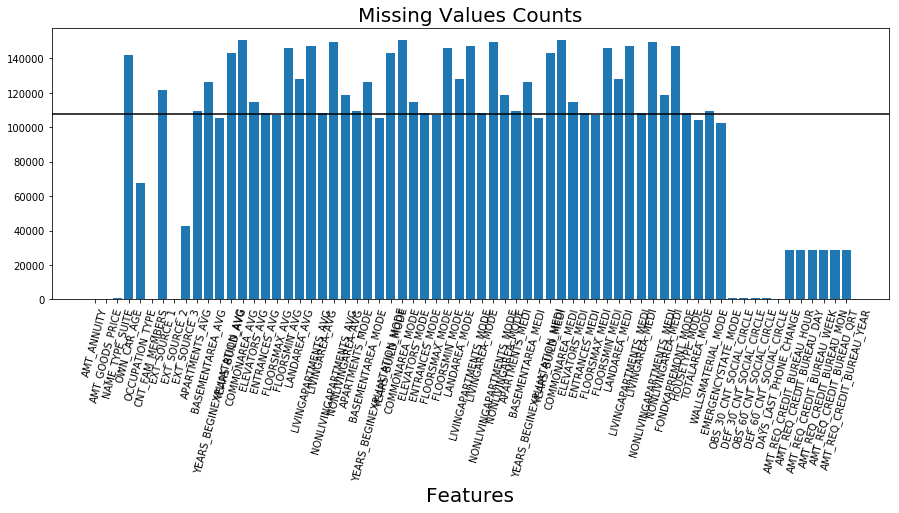

In [15]:
plt.figure(figsize = (15,5))
plt.bar(nacount.index,height = nacount['Count'])
plt.xticks(rotation=75)
plt.xlabel('Features', fontsize = 20)
plt.title('Missing Values Counts', fontsize = 20)
plt.axhline(y=X_train.shape[0]/2, color='black', linestyle='-')
## above: missing more than 50% of data
plt.show()

## Retrieve columns with # missing values > threshold

In [16]:
def filter_out_missing(NAdataframe, threshold):
    nacount_filtered = NAdataframe[NAdataframe['Percentage(%)']>=threshold]
    nacount_sorted = nacount_filtered.sort_index()
    filter_corr = nacount_filtered.index.tolist()
    filter_corr.append("TARGET")
    return nacount_sorted, filter_corr

In [17]:
nacount_sorted, filter_corr = filter_out_missing(nacount,50)

In [18]:
X_train_corr_copy = X_train.copy()
X_train_corr_copy['TARGET'] = y_train

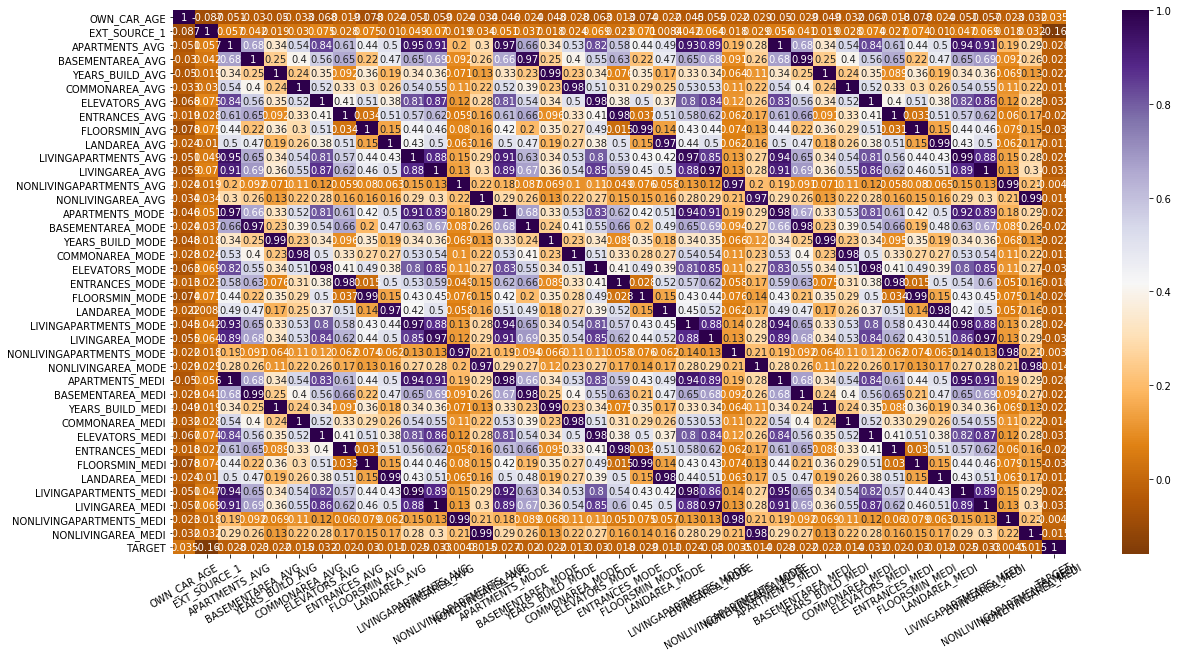

In [19]:
corr = X_train_corr_copy[filter_corr].corr()
fig, ax = plt.subplots(figsize=(20,10))
heatmap = sns.heatmap(corr, ax=ax, annot=True, cmap="PuOr")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=30)
plt.show()

In [20]:
# From those missing more than 50%, select those features correlated with Target
corr.iloc[-1,:][np.abs(corr.iloc[-1,:].sort_values()) > 0.1]

EXT_SOURCE_1   -0.160713
TARGET          1.000000
Name: TARGET, dtype: float64

In [21]:
filter_corr.remove('EXT_SOURCE_1')
filter_corr.remove('TARGET')

In [22]:
# Keep Median values, drop mode and avg
drop_label = [x for x in filter_corr if 'MEDI' not in x]

In [23]:
print(len(drop_label))
print(X_train.shape)

28
(215257, 121)


In [24]:
def first_drop_stage(dataframe, drop_label):
    dataframe = dataframe.drop(labels = drop_label, axis = 1)
    return dataframe

### Drop more than 50% missing columns from train and test

In [25]:
X_train = first_drop_stage(X_train, drop_label)
X_test = first_drop_stage(X_test, drop_label)

In [26]:
# Drop 28 columns from 121 columns
# 93 remains
print(X_train.shape)
print(X_test.shape)

(215257, 93)
(92254, 93)


### get categorical and numerical features

In [27]:
def get_type_col_orig(dataframe, types_list):      
    type_col[i] = dataframe.dtypes[dataframe.dtypes == i].index.tolist()

In [28]:
# ## Originial:
# types_list = ['object', 'int64', 'float64']
# type_col = {}
# def get_type_col_orig(dataframe, types_list):      
#     type_col[i] = dataframe.dtypes[dataframe.dtypes == i].index.tolist()
    
# start_time = time.process_time()
# for i in types_list:
#     get_type_col_orig(X_train, i)
# time_orig = time.process_time() - start_time
# print(time_orig,'s')

In [29]:
# ## Optimize
# types_list = ['object', 'int64', 'float64']
# def get_type_col(dataframe, types_list):
#     type_col = {}
#     for i in types_list:        
#         type_col[i] = dataframe.dtypes[dataframe.dtypes == i].index.tolist()
#     return type_col

# start_time = time.process_time()
# type_col = get_type_col(X_train, types_list)
# time_opt = time.process_time() - start_time
# print(time_opt,'s')

In [30]:
# (time_orig - time_opt)/time_orig

In [31]:
## Optimize
types_list = ['object', 'int64', 'float64']
def get_type_col(dataframe, types_list):
    type_col = {}
    for i in types_list:        
        type_col[i] = dataframe.dtypes[dataframe.dtypes == i].index.tolist()
    return type_col

type_col = get_type_col(X_train, types_list)


In [32]:
object_type_col = type_col['object']
int64_type_col = type_col['int64']
float64_type_col = type_col['float64']
print(len(object_type_col), len(int64_type_col), len(float64_type_col))

13 40 40


In [33]:
def get_cat_numerical(type_col):
    ## retrieve categorical features from int64_col
    cat_in_int64 = []
    for item in type_col['int64']:
        if ('FLAG_' in item) or ('REG_' in item) or ('LIVE_' in item) or ('HOUR_APPR' in item):
            cat_in_int64.append(item) 
    cat_feature = type_col['object'] + cat_in_int64
    
    # get numerical features
    num_feature = [x for x in X_train.columns.values.tolist() if x not in cat_feature]
    num_feature.remove('SK_ID_CURR')
    return cat_feature, num_feature

In [34]:
cat_feature, num_feature = get_cat_numerical(type_col)

### At this stage, num_features and cat_features are filtered out. 
### Index and Target are excluded

In [35]:
print(len(num_feature),len(cat_feature))

46 46


In [36]:
# Check missing values inside category features
X_train[cat_feature].isna().sum()

NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
NAME_TYPE_SUITE                   904
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
OCCUPATION_TYPE                 67553
WEEKDAY_APPR_PROCESS_START          0
ORGANIZATION_TYPE                   0
EMERGENCYSTATE_MODE            102265
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL                          0
HOUR_APPR_PROCESS_START             0
REG_REGION_NOT_LIVE_REGION          0
REG_REGION_NOT_WORK_REGION          0
LIVE_REGION_NOT_WORK_REGION         0
REG_CITY_NOT_LIVE_CITY              0
REG_CITY_NOT_WORK_CITY              0
LIVE_CITY_NOT_WORK_CITY             0
FLAG_DOCUMEN

In [37]:
## the most missing class - flag as unknown - 96391 missing
## fill missing values with Unknown
print(X_train.isna().sum()['OCCUPATION_TYPE'])
X_train['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)
X_test['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

67553


In [38]:
## Drop the column - 145755 missing
## check correlation
X_train.isna().sum()['EMERGENCYSTATE_MODE']

102265

In [39]:
confusion_matrix = pd.crosstab(X_train['EMERGENCYSTATE_MODE'], y_train['TARGET'])
confusion_matrix

TARGET,0,1
EMERGENCYSTATE_MODE,,
No,103500,7850
Yes,1479,163


In [40]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [41]:
cramers_corrected_stat(confusion_matrix)

0.012931465360096426

### Drop 'EMERGENCYSTATE_MODE' from train and test

In [42]:
X_train = X_train.drop(labels = 'EMERGENCYSTATE_MODE', axis = 1)
X_test = X_test.drop(labels = 'EMERGENCYSTATE_MODE', axis = 1)

In [43]:
cat_feature.remove('EMERGENCYSTATE_MODE')

In [44]:
X_train.isna().sum()['NAME_TYPE_SUITE']
## Fill with 'unaccommpanied'/ 'unknown' -- 1292 missing

904

In [45]:
X_train['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      173927
Family              28148
Spouse, partner      7943
Children             2272
Other_B              1269
Other_A               606
Group of people       188
Name: NAME_TYPE_SUITE, dtype: int64

In [46]:
merge_groups_list = X_train['NAME_TYPE_SUITE'].value_counts().index.tolist()[-3:]
def handle_name_type_suite(dataframe, merge_groups_list):
    dataframe['NAME_TYPE_SUITE'].fillna('Others', inplace=True)
    for i in merge_groups_list:
        dataframe['NAME_TYPE_SUITE'].loc[dataframe['NAME_TYPE_SUITE'] == i] = 'Others'

In [47]:
handle_name_type_suite(X_train, merge_groups_list)
handle_name_type_suite(X_test, merge_groups_list)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [48]:
print(X_train[cat_feature].isna().sum().sum())
print(X_test[cat_feature].isna().sum().sum())

0
0


### all cat_features now have non-missing values
### take care of num_features

In [49]:
X_train[num_feature].isna().sum()

CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         10
AMT_GOODS_PRICE                    194
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
CNT_FAM_MEMBERS                      1
REGION_RATING_CLIENT                 0
REGION_RATING_CLIENT_W_CITY          0
EXT_SOURCE_1                    121488
EXT_SOURCE_2                       488
EXT_SOURCE_3                     42632
YEARS_BEGINEXPLUATATION_AVG     105173
FLOORSMAX_AVG                   107261
YEARS_BEGINEXPLUATATION_MODE    105173
FLOORSMAX_MODE                  107261
APARTMENTS_MEDI                 109407
BASEMENTAREA_MEDI               126106
YEARS_BEGINEXPLUATATION_MEDI    105173
YEARS_BUILD_MEDI                143257
COMMONAREA_MEDI                 150436
ELEVATORS_MEDI           

In [50]:
## ['YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'TOTALAREA_MODE'] should be removed
## ['YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG'] should be removed
mode_list = [x for x in num_feature if '_MODE' in x]
avg_list = [x for x in num_feature if '_AVG' in x]
drop_label_avg_mode = mode_list + avg_list

In [51]:
X_train = X_train.drop(labels = drop_label_avg_mode, axis = 1)
X_test = X_test.drop(labels = drop_label_avg_mode, axis = 1)

In [52]:
num_feature = [x for x in num_feature if x not in mode_list]
num_feature = [x for x in num_feature if x not in avg_list]

In [53]:
X_train[num_feature].isna().sum()

CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         10
AMT_GOODS_PRICE                    194
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
CNT_FAM_MEMBERS                      1
REGION_RATING_CLIENT                 0
REGION_RATING_CLIENT_W_CITY          0
EXT_SOURCE_1                    121488
EXT_SOURCE_2                       488
EXT_SOURCE_3                     42632
APARTMENTS_MEDI                 109407
BASEMENTAREA_MEDI               126106
YEARS_BEGINEXPLUATATION_MEDI    105173
YEARS_BUILD_MEDI                143257
COMMONAREA_MEDI                 150436
ELEVATORS_MEDI                  114867
ENTRANCES_MEDI                  108534
FLOORSMAX_MEDI                  107261
FLOORSMIN_MEDI                  146149
LANDAREA_MEDI            

In [54]:
def handle_numerical_features(train_base, dataframe, num_feature):
    for item in num_feature:
        if dataframe[item].isna().sum() != 0:
            dataframe[item].fillna((train_base[item].median()), inplace=True) 

In [55]:
handle_numerical_features(X_train, X_train, num_feature)
handle_numerical_features(X_train, X_test, num_feature)

In [56]:
print(X_train[cat_feature].isna().sum().sum())
print(X_test[cat_feature].isna().sum().sum())

0
0


### At this stage, all missing values are handled

In [57]:
print(X_train.shape)
print(X_test.shape)

(215257, 87)
(92254, 87)


In [58]:
len(cat_feature)

45

In [59]:
len(num_feature)

41

In [80]:
45+41+1

87

## Imbalanced Dataset - SMOTE

In [88]:
X_train = X_train.drop(labels = 'SK_ID_CURR', axis = 1)
X_test = X_test.drop(labels = 'SK_ID_CURR', axis = 1)

In [ ]:
X_train.head()

In [ ]:
print('Shape of X: {}'.format(X_train.shape))
print('Shape of y: {}'.format(y_train.shape))

In [ ]:
print("Before OverSampling, counts of label '1' in training dataset: {}".format(np.sum(y_train==1)[0]))
print("Before OverSampling, counts of label '0' in training dataset: {}".format(np.sum(y_train==0)[0]))

In [ ]:
## retrieve the index of categorical features
train_features = X_train.columns.tolist()
cat_index = [train_features.index(i) for i in cat_feature]

In [ ]:
sm = SMOTENC(random_state=42, categorical_features=cat_index)
X_resample, y_resample = sm.fit_resample(X_train,y_train)

In [ ]:
# pkl.dump(X_resample, open("X_resample_0502.p", "wb"))
# pkl.dump(y_resample, open("y_resample_0502.p", "wb"))
X_resample = pkl.load(open("X_resample.p", "rb"))
y_resample = pkl.load(open("y_resample.p", "rb"))

In [86]:
X_resample = pd.DataFrame(X_resample, columns=train_features)
y_resample = pd.DataFrame(y_resample, columns=['TARGET'], dtype = 'int64')

In [98]:
dtype_dict = dict(zip(X_train.dtypes.index, X_train.dtypes.values))
for k, v in dtype_dict.items():
    X_resample[k] = X_resample[k].astype(v)

In [99]:
print('After OverSampling, the shape of X: {}'.format(X_resample.shape))
print('After OverSampling, the shape of y: {} \n'.format(y_resample.shape))

print("After OverSampling, counts of label '1': {}".format(np.sum(y_resample==1)[0]))
print("After OverSampling, counts of label '0': {}".format(np.sum(y_resample==0)[0]))

After OverSampling, the shape of X: (395544, 86)
After OverSampling, the shape of y: (395544, 1) 

After OverSampling, counts of label '1': 197772
After OverSampling, counts of label '0': 197772


In [91]:
# pkl.dump(X_resample, open("X_resample_dataframe_0502.p", "wb"))
# pkl.dump(y_resample, open("y_resample_dataframe_0502.p", "wb"))
X_resample = pkl.load(open("X_resample_dataframe.p", "rb"))
y_resample = pkl.load(open("y_resample_dataframe.p", "rb"))

In [62]:
X_resample.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Bar chart Example - How many children does applicants have

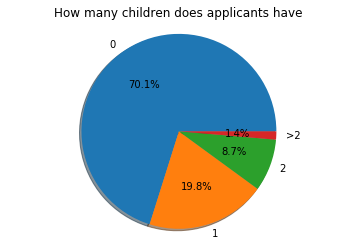

In [73]:
count_children = X_train['CNT_CHILDREN'].value_counts()
sizes = count_children.values
sizes_ = sizes[:3]
sizes_ = np.append(sizes_, sizes[3:].sum())
labels = count_children.index
labels_ = labels[:3]
labels_ = np.append(labels_,'>2')
fig1, ax1 = plt.subplots()
ax1.pie(sizes_, labels=labels_, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal') 
ax1.set_title('How many children does applicants have')
plt.show()

In [74]:
X_train['AMT_INCOME_TOTAL'].describe()

count    2.152570e+05
mean     1.689097e+05
std      2.758216e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.458000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

## Rescale the numeric feature

In [60]:
def feature_normalization(base, dataset, columns_sel):
    dataset[columns_sel] = (dataset[columns_sel] - base[columns_sel].min(axis=0))/ \
    (base[columns_sel].max(axis=0) - base[columns_sel].min(axis=0))
    return dataset

# def feature_normalization(dataset):
#     numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#     selected = dataset.select_dtypes(include=numerics)
#     # exclude SK_ID_CURR and target
#     # exclude FLAG_ish indicator variables
#     columns_sel = selected.columns[~selected.columns.str.contains(pat = 'FLAG_|REG_|LIVE_|HOUR_APPR_PROCESS_START')][2:]
#     print(columns_sel.values)
#     print(len(columns_sel))
#     dataset[columns_sel] = (dataset[columns_sel] - dataset[columns_sel].min(axis=0))/ \
#     (dataset[columns_sel].max(axis=0) - dataset[columns_sel].min(axis=0))
# #     df[columns_sel] = pd.DataFrame(scaler.fit_transform(df[columns_sel]))
#     return dataset

In [61]:
X_train = feature_normalization(X_train, X_train, num_feature)
X_test = feature_normalization(X_train, X_test, num_feature)

## Create dummy variables

In [62]:
flag_word_to_number_list = ['FLAG_OWN_CAR', 'CODE_GENDER', 'FLAG_OWN_REALTY']

def handle_word(dataframe, flag_list):
    for item in flag_list:
        if 'Y' in list(dataframe[item]):
            dataframe[item] = dataframe[item].map({'Y': 1, 'N': 0})
        elif 'F' in list(dataframe[item]):
            dataframe[item] = dataframe[item].map({'F': 1, 'M': 0})
    dataframe['CODE_GENDER'].fillna(0, inplace=True)

In [63]:
def create_dummy(dataframe):
    dummy_feature = [i for i in cat_feature if 'FLAG_' not in i]
    dummy_feature.remove('CODE_GENDER')
    X_prepared = pd.get_dummies(dataframe, columns=dummy_feature)
    return X_prepared

In [64]:
handle_word(X_train, flag_word_to_number_list)
handle_word(X_test, flag_word_to_number_list)
X_train = create_dummy(X_train)
X_test = create_dummy(X_test)

In [65]:
X_train.shape

(215257, 223)

In [66]:
X_test.shape

(92254, 223)

## Anomalies detection

In [121]:
(X_train['DAYS_BIRTH'] / -365).describe()
# seems fine

count    215257.000000
mean         -0.001419
std           0.000674
min          -0.002740
25%          -0.001979
50%          -0.001461
75%          -0.000855
max          -0.000000
Name: DAYS_BIRTH, dtype: float64

In [122]:
(X_train['DAYS_EMPLOYED']).describe()

# (train_with_dummy['DAYS_EMPLOYED'] / -365).describe()
# (train_with_dummy['DAYS_EMPLOYED'] / -365).plot.hist()

count    215257.000000
mean          0.212862
std           0.369238
min           0.000000
25%           0.038720
50%           0.042750
75%           0.045172
max           1.000000
Name: DAYS_EMPLOYED, dtype: float64

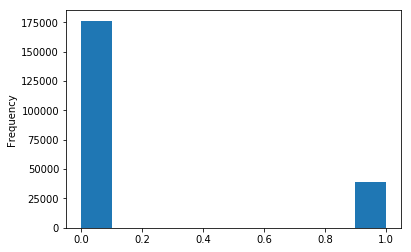

In [123]:
(X_train['DAYS_EMPLOYED']).plot.hist()

In [124]:
X_train['DAYS_EMPLOYED'].replace({1: np.nan}, inplace = True)
X_train['DAYS_EMPLOYED'].fillna(X_train['DAYS_EMPLOYED'].median(), inplace=True)

In [125]:
(X_train['DAYS_EMPLOYED']).describe()

count    215257.000000
mean          0.040044
std           0.005582
min           0.000000
25%           0.038720
50%           0.041622
75%           0.043479
max           0.045929
Name: DAYS_EMPLOYED, dtype: float64

In [126]:
X_test['DAYS_EMPLOYED'].replace({1: np.nan}, inplace = True)
X_test['DAYS_EMPLOYED'].fillna(X_train['DAYS_EMPLOYED'].median(), inplace=True)

## Correlation between X and y

In [77]:
correlations = X_prepared.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

NameError: name 'X_prepared' is not defined

In [25]:
## days-birth has high correlation with target
## bigger, more likely to default
## but days-birth is all negative
## thus younger, more likely to default

## Bin the days-birth

In [26]:
# Age information into a separate dataframe
age_data = train_with_dummy[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / -365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,-9461,25.920548,"(25.0, 30.0]"
1,0,-16765,45.931507,"(45.0, 50.0]"
2,0,-19046,52.180822,"(50.0, 55.0]"
3,0,-19005,52.068493,"(50.0, 55.0]"
4,0,-19932,54.608219,"(50.0, 55.0]"
5,0,-16941,46.413699,"(45.0, 50.0]"
6,0,-13778,37.747945,"(35.0, 40.0]"
7,0,-18850,51.643836,"(50.0, 55.0]"
8,0,-20099,55.065753,"(55.0, 60.0]"
9,0,-14469,39.641096,"(35.0, 40.0]"


In [27]:
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,-8532.795625,23.377522
"(25.0, 30.0]",0.111436,-10155.219250,27.822518
"(30.0, 35.0]",0.102814,-11854.848377,32.479037
"(35.0, 40.0]",0.089414,-13707.908253,37.555913
"(40.0, 45.0]",0.078491,-15497.661233,42.459346
"(45.0, 50.0]",0.074171,-17323.900441,47.462741
"(50.0, 55.0]",0.066968,-19196.494791,52.593136
"(55.0, 60.0]",0.055314,-20984.262742,57.491131
"(60.0, 65.0]",0.052737,-22780.547460,62.412459


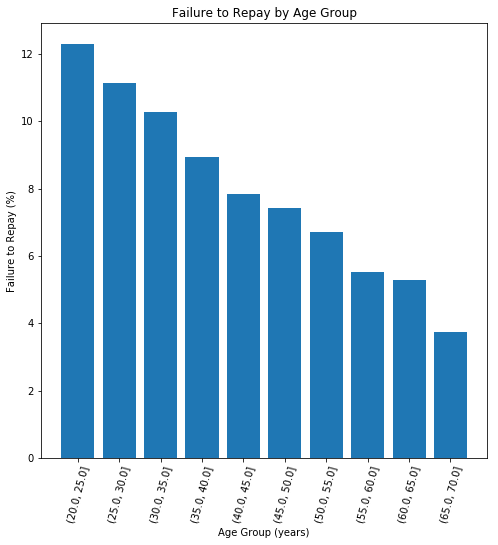

In [28]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

In [29]:
ext_data = train_with_dummy[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,-0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,-0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,-0.205478
DAYS_BIRTH,0.078239,-0.600610,-0.091996,-0.205478,1.000000


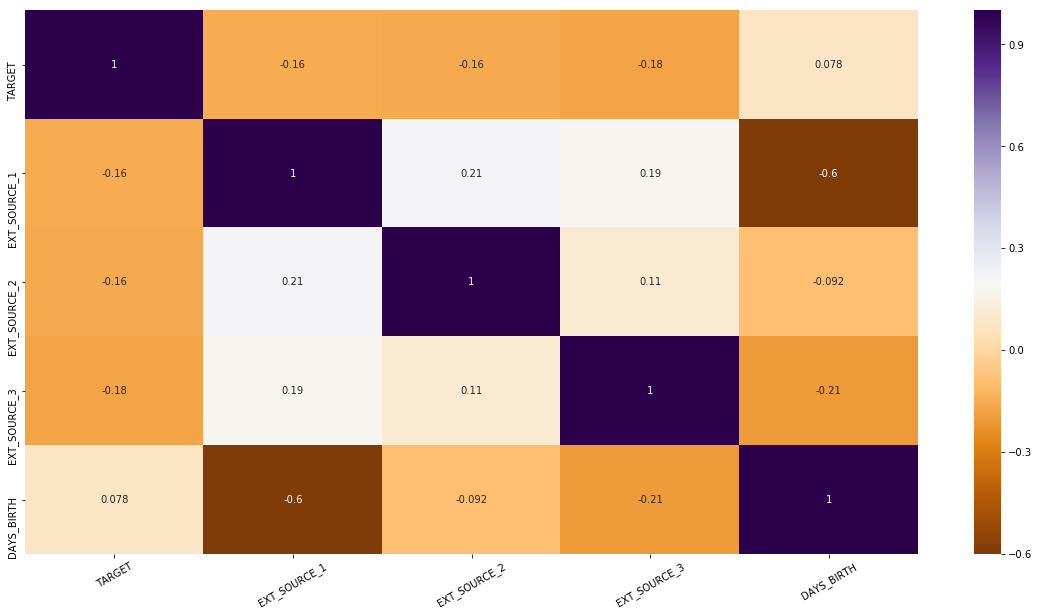

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
heatmap = sns.heatmap(ext_data_corrs, ax=ax, annot=True, cmap="PuOr")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=30)
# plt.savefig(path+'plot/correlationmatrix.eps')
plt.show()

In [31]:
## larger the external source, the more likely they will repay the loan
## ext-1 maybe the age - hihgly correlated

## Domain knowledge feature extraction

In [32]:
## CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
## ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
## CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due
## DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age

In [32]:
train_with_dummy['CREDIT_INCOME_PERCENT'] = train_with_dummy['AMT_CREDIT'] / train_with_dummy['AMT_INCOME_TOTAL']
train_with_dummy['ANNUITY_INCOME_PERCENT'] = train_with_dummy['AMT_ANNUITY'] / train_with_dummy['AMT_INCOME_TOTAL']
train_with_dummy['CREDIT_TERM'] = train_with_dummy['AMT_ANNUITY'] / train_with_dummy['AMT_CREDIT']
train_with_dummy['DAYS_EMPLOYED_PERCENT'] = train_with_dummy['DAYS_EMPLOYED'] / train_with_dummy['DAYS_BIRTH']

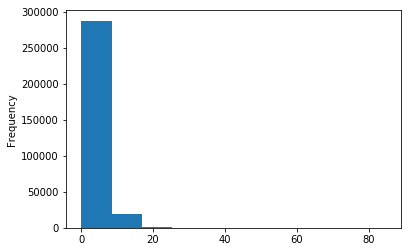

In [33]:
train_with_dummy['CREDIT_INCOME_PERCENT'].plot.hist()

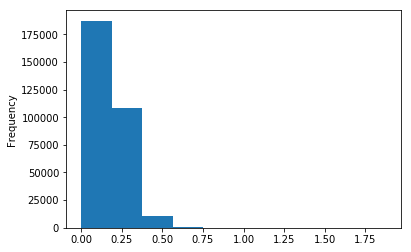

In [34]:
train_with_dummy['ANNUITY_INCOME_PERCENT'].plot.hist()

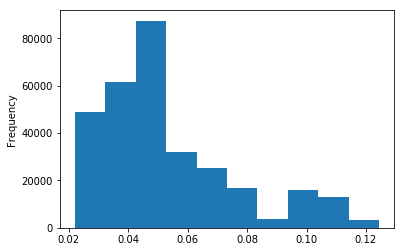

In [35]:
train_with_dummy['CREDIT_TERM'].plot.hist()

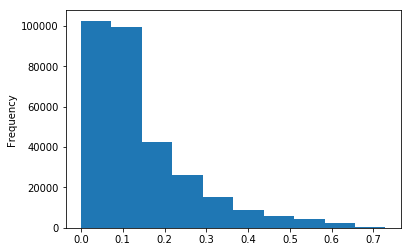

In [36]:
train_with_dummy['DAYS_EMPLOYED_PERCENT'].plot.hist()

In [74]:
# https://elitedatascience.com/imbalanced-classes
# The final tactic we'll consider is using tree-based algorithms. 
# Decision trees often perform well on imbalanced datasets because their hierarchical structure allows 
# them to learn signals from both classes.

# In modern applied machine learning, tree ensembles (Random Forests, Gradient Boosted Trees, etc.) 
# almost always outperform singular decision trees, so we'll jump right into those:

## modeling

In [89]:
X_train.isna().sum().sum()

0

In [90]:
X_test.isna().sum().sum()

0

### Naive Bayes

In [91]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
metrics.roc_auc_score(y_test, pred)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5392888775622254

### Logistic Regression

### LR supports sample weight

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
print(np.sum(y_train['TARGET']==1))
print(np.sum(y_train['TARGET']==0))

17485
197772


In [94]:
weight_0 = np.sum(y_train['TARGET']==0) / (np.sum(y_train['TARGET']==0) + np.sum(y_train['TARGET']==1))

In [95]:
weight_1 = 1 - weight_0

In [101]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [96]:
logreg = LogisticRegression(class_weight={0:weight_0, 1:weight_1})
logreg.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0,
          class_weight={0: 0.9187715149797684, 1: 0.08122848502023161},
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
          random_state=None, solver='warn', tol=0.0001, verbose=0,
          warm_start=False)

In [117]:
y_pred = logreg.predict_proba(X_test)[:, 1]

In [118]:
y_pred

array([0.03119806, 0.0930823 , 0.03236186, ..., 0.03493825, 0.05278196,
       0.04764987])

In [120]:
print("AUC:", metrics.roc_auc_score(y_test, y_pred))

AUC: 0.6200281624896458


### SVM

### SVM supports class weight

In [89]:
from sklearn import svm

In [2]:
clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

NameError: name 'X_train' is not defined

### Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [ ]:
random_forest.fit(X_train, y_train)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
# feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})



In [111]:
# Make predictions on the test data
predictions = random_forest.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.8s finished


In [115]:
predictions

array([0.24, 0.04, 0.1 , ..., 0.13, 0.09, 0.04])

In [116]:
print("AUC:", metrics.roc_auc_score(y_test, predictions))

AUC: 0.7136436270285711


### LightGBM

In [67]:
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, y_train, free_raw_data=False)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train, free_raw_data=False)

/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [68]:
params = {
     'task': 'train',
     'objective':'binary',
     'metric': 'auc',
     'verbose': 0,
     'binary'
     'max_bin': 128,  # 大会有更准的效果,更慢的速度
     'learning_rate': 0.01,  # 学习率
     'num_leaves': 50,  # 大会更准,但可能过拟合
     'num_iterations': 500,
     'early_stopping_round': 5,
     'min_data_in_leaf': 5,
     'max_depth': 10,
    }

In [141]:
gbm = lgb.train(params,lgb_train, valid_sets = [lgb_eval], verbose_eval = False)
print(gbm.best_score['valid_0'])

/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


{'auc': 0.7557652945737245}


In [98]:
num_leaves = [50, 100]
min_data_in_leaf = [5, 10]
max_depth = [5, 7]

In [99]:
param = [((ia, ib, ic), (a, b, c)) for ia, a in enumerate(num_leaves) 
        for ib, b in enumerate(min_data_in_leaf)
        for ic, c in enumerate(max_depth)]

In [100]:
score = np.zeros([2,2,2])

In [101]:
from tqdm import tqdm_notebook as tqdm

In [ ]:
for (ia, ib, ic), (a, b, c) in tqdm(param):
    params = {
     'task': 'train',
     'objective':'regression',
     'metric': 'auc',
     'verbose': 0,

     'max_bin': 128,  # 大会有更准的效果,更慢的速度
     'learning_rate': 0.01,  # 学习率
     'num_leaves': a,  # 大会更准,但可能过拟合
     'num_iterations': 1000,
     'early_stopping_round': 5,
     'min_data_in_leaf': b,
     'max_depth': c,
    }
#     print('Running {}-{}-{}, {}/343'.format(ia, ib, ic, (ia)*49 + (ib) * 7 + ic + 1))
    gbm = lgb.train(params,
                    lgb_train, valid_sets = [lgb_eval], verbose_eval = False)
    print(gbm.best_score['valid_0'])
    score[ia, ib, ic] = gbm.best_score['valid_0']['auc']
#     print('Score is {}'.format(gbm.best_score['valid_0']['l2_root']))

/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
